In [1]:
library(data.table)
library(ggplot2)

In [2]:
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"

In [3]:
myfile = paste0(saige_dir, "all_ct_loci.list.withCate.qvalue")
df = as.data.frame(fread(myfile))
head(df)

,celltype,gene,R1,R2,R3,R4,R5,R6,pval_beta,pval_nominal,⋯,R3_Loci,R4_Loci,R5_Loci,R6_Loci,R1_topPval,R2_topPval,R3_topPval,R4_topPval,R5_topPval,R6_topPval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B_IN,A1BG,0.00170947,0.3706712,0.7981946,1.0000000,1.0000000,1.0000000,0.0040709,6.147731e-06,⋯,19:57957633:T:A,19:57863937:T:C,19:58872853:G:C,19:58733610:G:T,1.13564e-05,0.00402990,0.00845249,0.00692103,0.01196660,0.01037450
2,B_IN,A1BG.AS1,0.86506417,0.7648255,0.7769261,0.8074401,0.8690257,0.8953325,0.1423371,4.116421e-04,⋯,19:58824721:C:T,19:57859145:G:T,19:57945146:T:A,19:58748944:G:A,5.88327e-03,0.00940976,0.02022780,0.06795570,0.36375100,0.06017900
3,B_IN,A2M.AS1,0.03372643,0.8588731,0.9812090,0.8513040,0.9699506,0.8875360,0.6810340,2.434186e-03,⋯,12:9352713:C:T,12:8735252:C:T,12:9019431:C:T,12:10180030:T:A,3.70324e-04,0.00468252,0.01319110,0.01270180,0.01632800,0.01658600
4,B_IN,AAAS,0.75205437,0.8530099,0.8065299,0.8407649,0.8048025,0.8305645,0.6815684,2.120636e-03,⋯,12:52724379:A:G,12:52790194:C:A,12:53369446:T:C,12:53272113:T:G,1.43271e-03,0.00816973,0.00405493,0.05945150,0.06605680,0.01559110
5,B_IN,AACS,0.77396060,0.8927420,1.0000000,1.0000000,1.0000000,1.0000000,0.9105249,2.389704e-03,⋯,12:126340960:G:A,12:125440950:T:C,12:125452272:C:G,12:124989178:C:T,1.32184e-03,0.00351769,0.00880461,0.00670560,0.00494218,0.00804547
6,B_IN,AAED1,0.09593074,0.6161421,0.7516514,0.8153506,0.8275136,0.9096267,0.6706081,2.944861e-03,⋯,9:98932408:T:C,9:100371876:A:G,9:99234329:C:T,9:98806319:C:A,1.25254e-03,0.00974049,0.00611698,0.00757482,0.00231567,0.01464380


In [4]:
celltypes = unique(df$celltype)

In [5]:
df_to_plot = data.frame()
for (celltype in celltypes){
    df0 = df[df$celltype == celltype,]
    new_df1 = data.frame(celltype = celltype,
                         round = "R1",
                         n = nrow(df0[df0$R1<0.05,]))
    new_df2 = data.frame(celltype = celltype,
                         round = "R2",
                         n = nrow(df0[df0$R2<0.05,]))
    new_df3 = data.frame(celltype = celltype,
                         round = "R3",
                         n = nrow(df0[df0$R3<0.05,]))
    new_df4 = data.frame(celltype = celltype,
                         round = "R4",
                         n = nrow(df0[df0$R4<0.05,]))
    new_df5 = data.frame(celltype = celltype,
                         round = "R5",
                         n = nrow(df0[df0$R5<0.05,]))
    df_to_plot = rbind(df_to_plot, new_df1, new_df2, new_df3, new_df4, new_df5)
}
df_to_plot$celltype_round = paste0(df_to_plot$celltype,"-",df_to_plot$round)
head(df_to_plot)

,celltype,round,n,celltype_round
,<chr>,<chr>,<int>,<chr>
1,B_IN,R1,2126,B_IN-R1
2,B_IN,R2,188,B_IN-R2
3,B_IN,R3,44,B_IN-R3
4,B_IN,R4,6,B_IN-R4
5,B_IN,R5,7,B_IN-R5
6,B_Mem,R1,1909,B_Mem-R1


In [6]:
df_to_plot$celltype_round <- factor(df_to_plot$celltype_round, 
                                    levels = c("CD4_NC-R1","CD4_NC-R2","CD4_NC-R3","CD4_NC-R4","CD4_NC-R5",
                                               "CD4_ET-R1","CD4_ET-R2","CD4_ET-R3","CD4_ET-R4","CD4_ET-R5",
                                               "CD4_SOX4-R1","CD4_SOX4-R2","CD4_SOX4-R3","CD4_SOX4-R4","CD4_SOX4-R5",
                                               "CD8_ET-R1","CD8_ET-R2","CD8_ET-R3","CD8_ET-R4","CD8_ET-R5",
                                               "CD8_NC-R1","CD8_NC-R2","CD8_NC-R3","CD8_NC-R4","CD8_NC-R5",
                                               "CD8_S100B-R1","CD8_S100B-R2","CD8_S100B-R3","CD8_S100B-R4","CD8_S100B-R5",
                                               "NK-R1","NK-R2","NK-R3","NK-R4","NK-R5",
                                               "NK_R-R1","NK_R-R2","NK_R-R3","NK_R-R4","NK_R-R5",
                                               "Plasma-R1","Plasma-R2","Plasma-R3","Plasma-R4","Plasma-R5",
                                               "B_Mem-R1","B_Mem-R2","B_Mem-R3","B_Mem-R4","B_Mem-R5",
                                               "B_IN-R1","B_IN-R2","B_IN-R3","B_IN-R4","B_IN-R5",
                                               "Mono_C-R1","Mono_C-R2","Mono_C-R3","Mono_C-R4","Mono_C-R5",
                                               "Mono_NC-R1","Mono_NC-R2","Mono_NC-R3","Mono_NC-R4","Mono_NC-R5",
                                               "DC-R1","DC-R2","DC-R3","DC-R4","DC-R5"))

In [7]:
df_colours = data.frame(colours = c("#882E72","#882E72","#882E72","#882E72","#882E72",
                                    "#B178A6","#B178A6","#B178A6","#B178A6","#B178A6",
                                    "#D6C1DE","#D6C1DE","#D6C1DE","#D6C1DE","#D6C1DE",
                                    "#1965B0","#1965B0","#1965B0","#1965B0","#1965B0",
                                    "#5289C7","#5289C7","#5289C7","#5289C7","#5289C7",
                                    "#7BAFDE","#7BAFDE","#7BAFDE","#7BAFDE","#7BAFDE",
                                    "#4EB265","#4EB265","#4EB265","#4EB265","#4EB265",
                                    "#90C987","#90C987","#90C987","#90C987","#90C987",
                                    "#CAE0AB","#CAE0AB","#CAE0AB","#CAE0AB","#CAE0AB",
                                    "#F7EE55","#F7EE55","#F7EE55","#F7EE55","#F7EE55",
                                    "#F6C141","#F6C141","#F6C141","#F6C141","#F6C141",
                                    "#F1932D","#F1932D","#F1932D","#F1932D","#F1932D",
                                    "#E8601C","#E8601C","#E8601C","#E8601C","#E8601C",
                                    "#DC050C","#DC050C","#DC050C","#DC050C","#DC050C"),
                        celltype_round = c("CD4_NC-R1","CD4_NC-R2","CD4_NC-R3","CD4_NC-R4","CD4_NC-R5",
                                               "CD4_ET-R1","CD4_ET-R2","CD4_ET-R3","CD4_ET-R4","CD4_ET-R5",
                                               "CD4_SOX4-R1","CD4_SOX4-R2","CD4_SOX4-R3","CD4_SOX4-R4","CD4_SOX4-R5",
                                               "CD8_ET-R1","CD8_ET-R2","CD8_ET-R3","CD8_ET-R4","CD8_ET-R5",
                                               "CD8_NC-R1","CD8_NC-R2","CD8_NC-R3","CD8_NC-R4","CD8_NC-R5",
                                               "CD8_S100B-R1","CD8_S100B-R2","CD8_S100B-R3","CD8_S100B-R4","CD8_S100B-R5",
                                               "NK-R1","NK-R2","NK-R3","NK-R4","NK-R5",
                                               "NK_R-R1","NK_R-R2","NK_R-R3","NK_R-R4","NK_R-R5",
                                               "Plasma-R1","Plasma-R2","Plasma-R3","Plasma-R4","Plasma-R5",
                                               "B_Mem-R1","B_Mem-R2","B_Mem-R3","B_Mem-R4","B_Mem-R5",
                                               "B_IN-R1","B_IN-R2","B_IN-R3","B_IN-R4","B_IN-R5",
                                               "Mono_C-R1","Mono_C-R2","Mono_C-R3","Mono_C-R4","Mono_C-R5",
                                               "Mono_NC-R1","Mono_NC-R2","Mono_NC-R3","Mono_NC-R4","Mono_NC-R5",
                                               "DC-R1","DC-R2","DC-R3","DC-R4","DC-R5"))
# df_colours

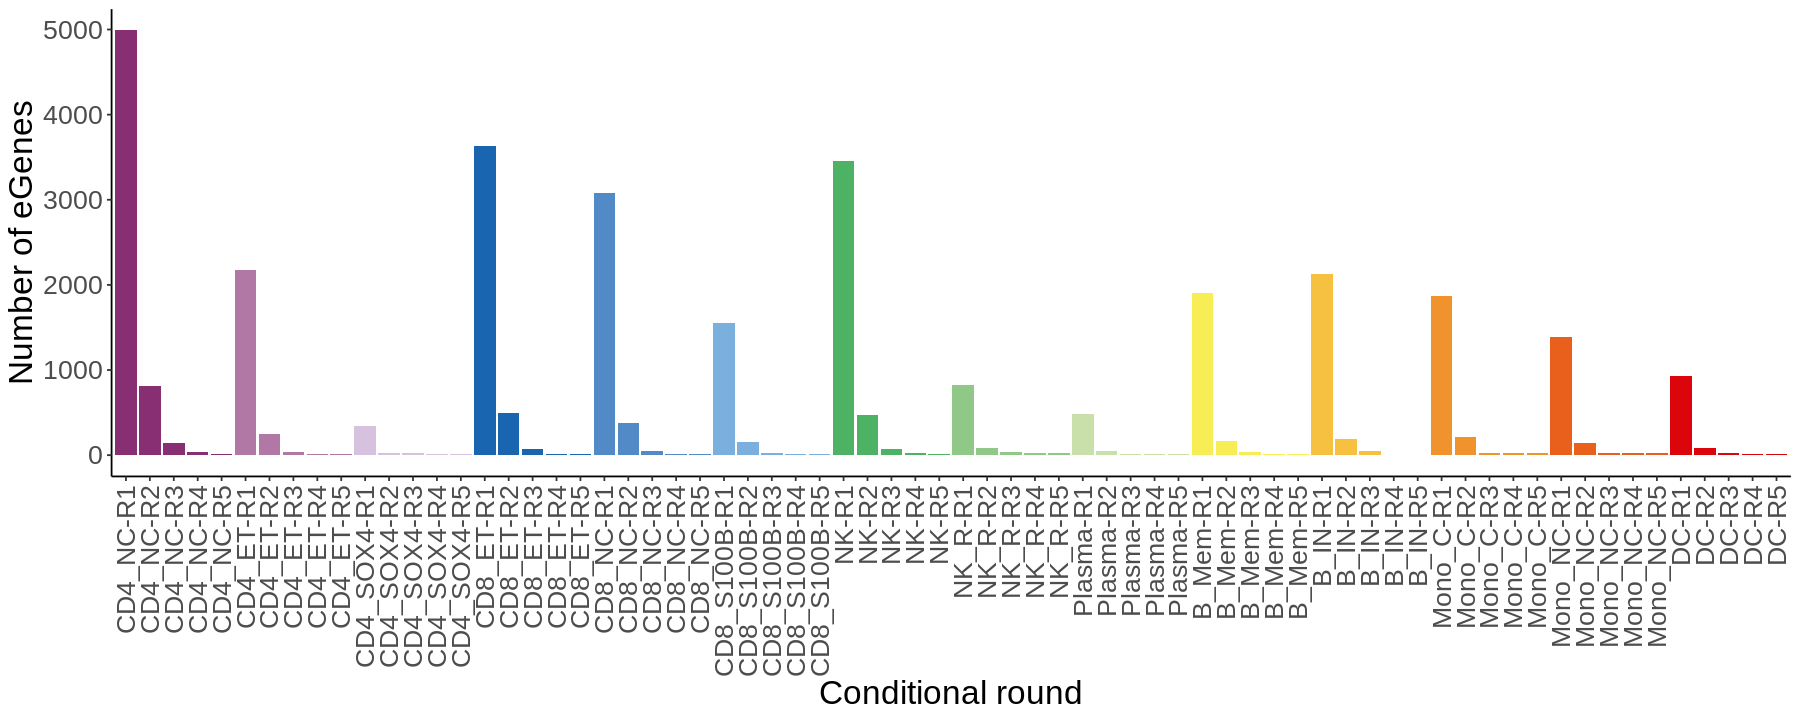

In [8]:
options(repr.plot.width = 15, repr.plot.height = 6)
p = ggplot(df_to_plot, aes(x=celltype_round, y=n, fill=celltype_round)) 
p = p + geom_bar(stat = "identity") 
p = p + scale_fill_manual(values = df_colours$colours) 
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p = p + ylab("Number of eGenes") + xlab("Conditional round")
p

In [9]:
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"conditional_eqtls.pdf"), width=15, height=6)
p
dev.off()

png 
  2

In [10]:
# Number of eQTLs rounds 2-5
sum(df_to_plot[df_to_plot$round != "R1",]$n)

[1] 4647

In [22]:
# Determine unique genes
# round 2
r2_genes = df[df$R2<0.05,"gene"]
length(unique(r2_genes))
# round 3
r3_genes = df[df$R3<0.05,"gene"]
length(unique(r3_genes))
# round 4
r4_genes = df[df$R4<0.05,"gene"]
length(unique(r4_genes))
# round 5
r5_genes = df[df$R5<0.05,"gene"]
length(unique(r5_genes))
# rounds 2-5
length(unique(c(r2_genes,r3_genes,r4_genes,r5_genes)))

[1] 2022

[1] 449

[1] 207

[1] 181

[1] 2435